In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
boston = load_boston()
type(boston)

sklearn.utils.Bunch

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [6]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [9]:
data = boston.data
type(data)

numpy.ndarray

In [10]:
data.shape

(506, 13)

In [14]:
data = pd.DataFrame(data=data,columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [20]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## Data Visualization

##### We will start by creating a scatterplot matrix that will allow us to visualize the pair-wise relationships and correlations between the different features.

##### It is also quite useful to have a quick overview of how the data is distributed and wheter it cointains or not outliers.

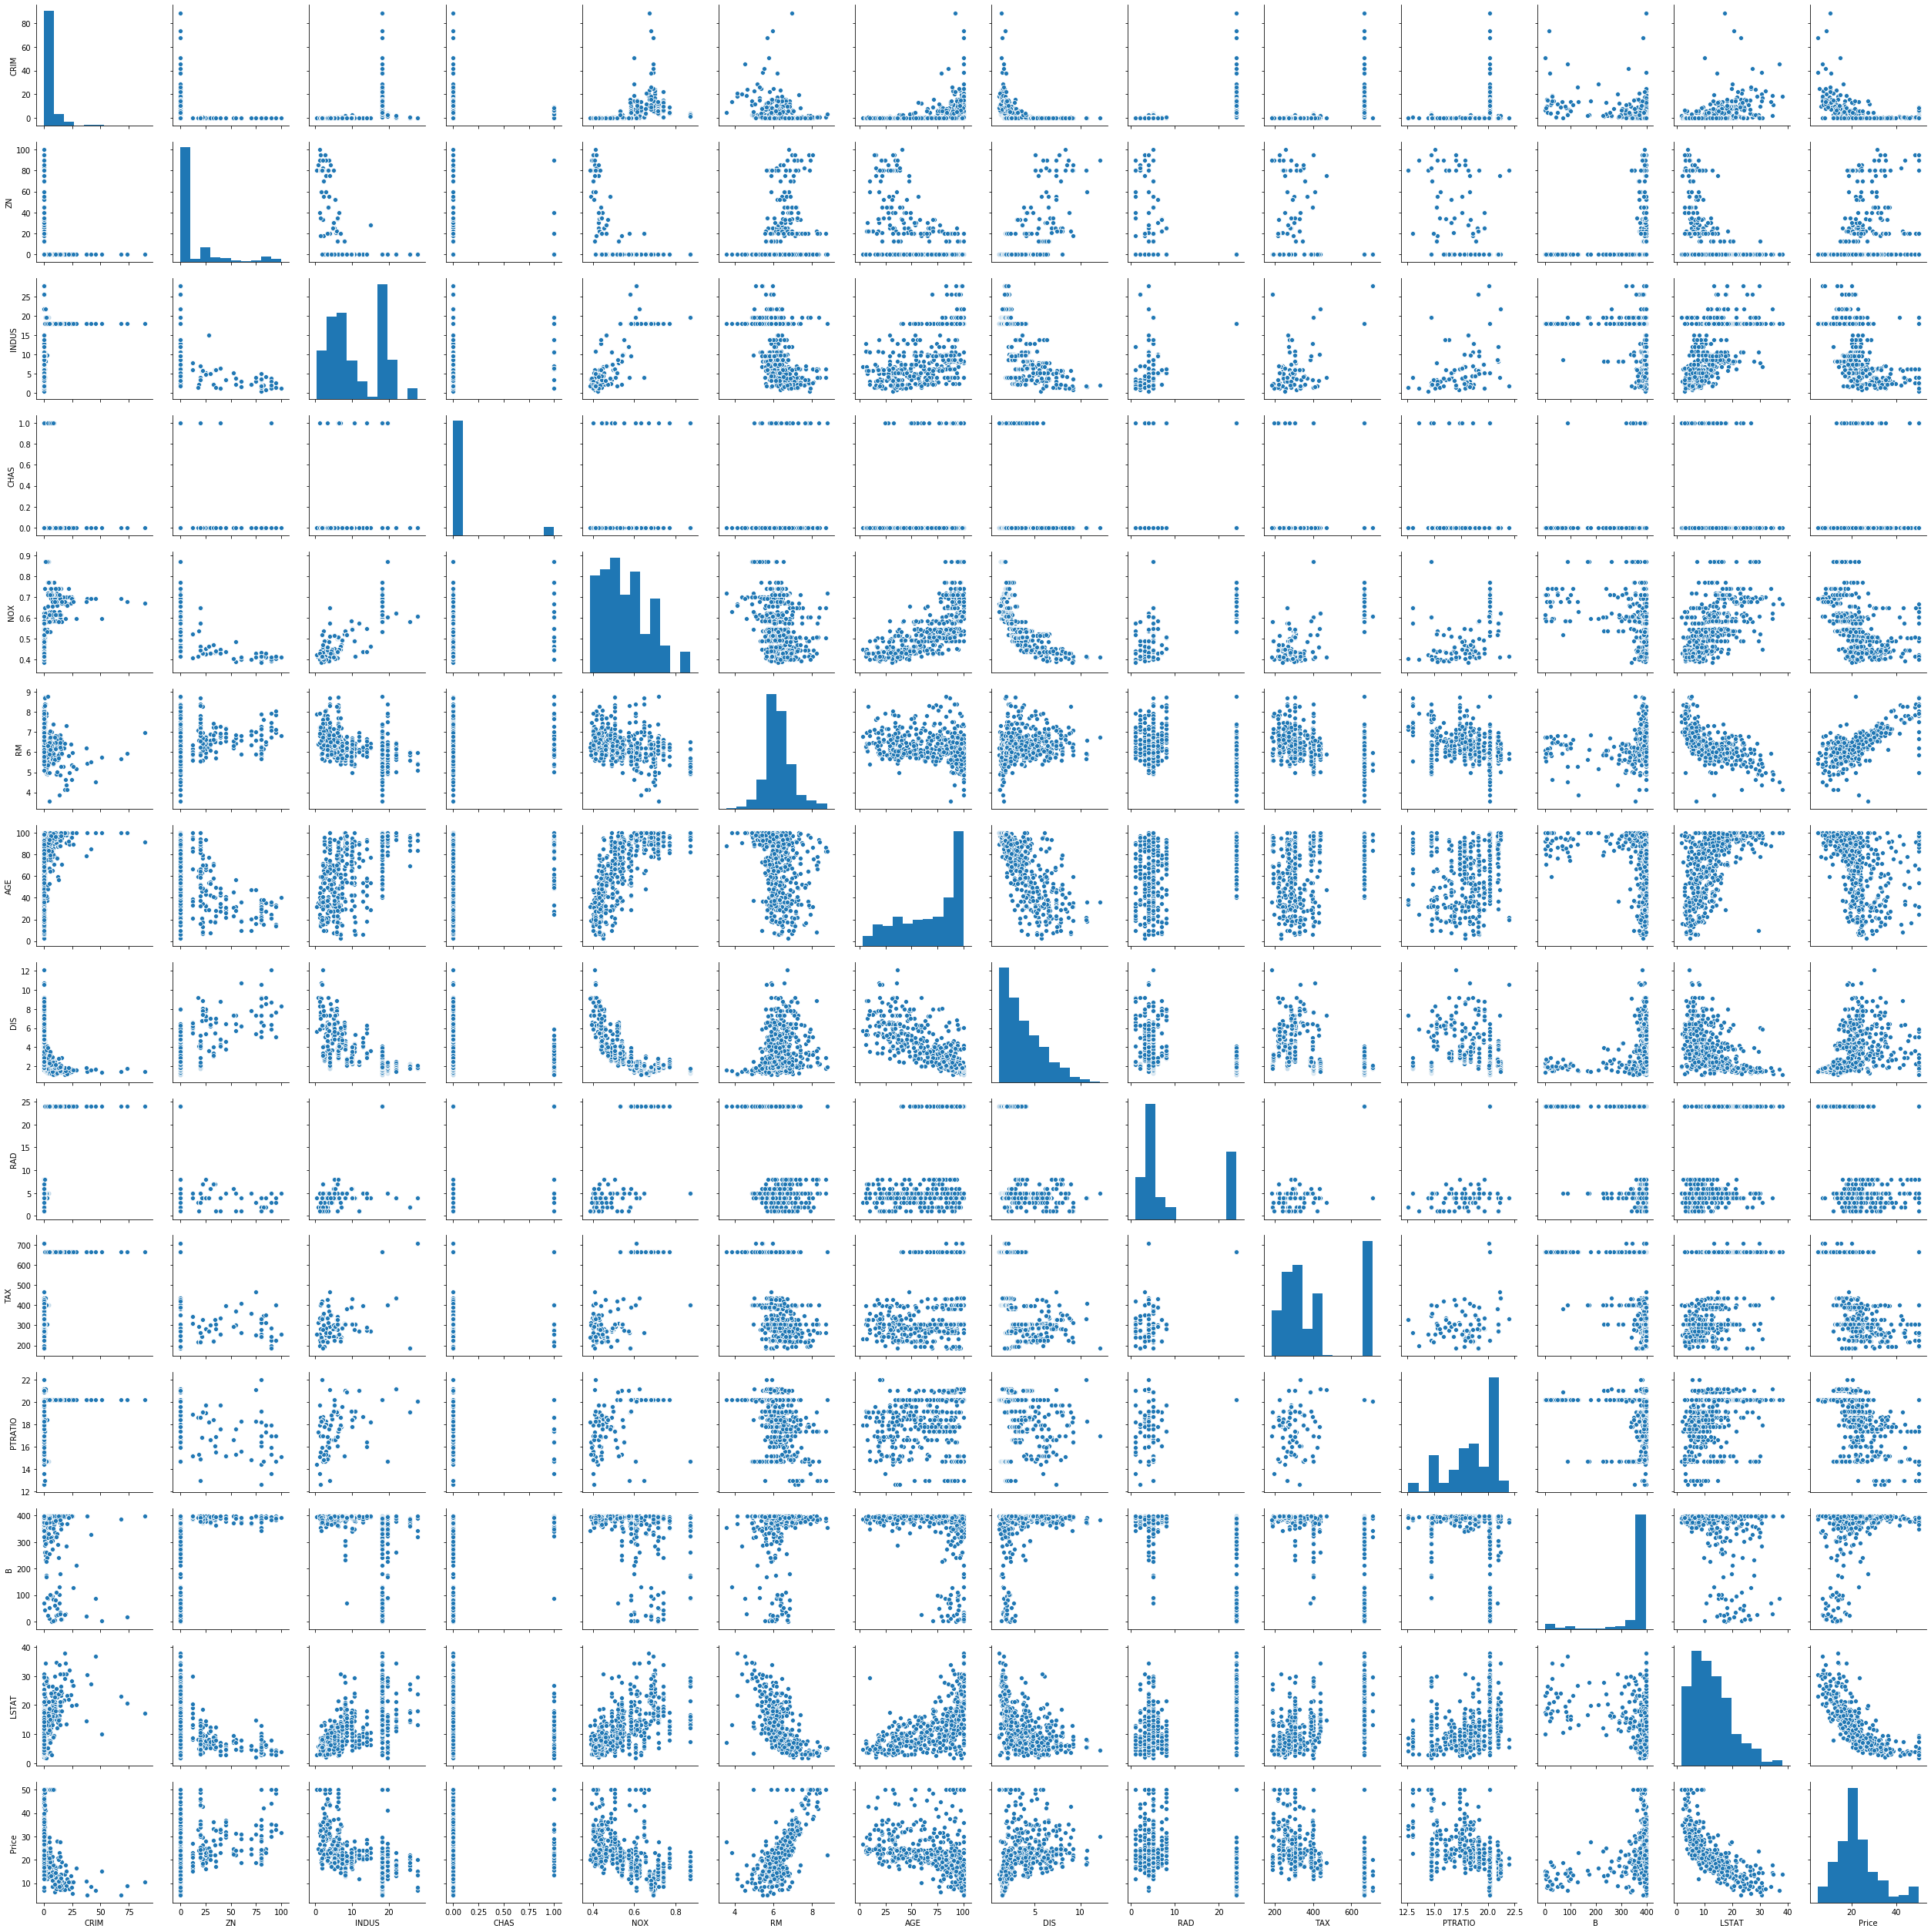

In [23]:
sns.pairplot(data)

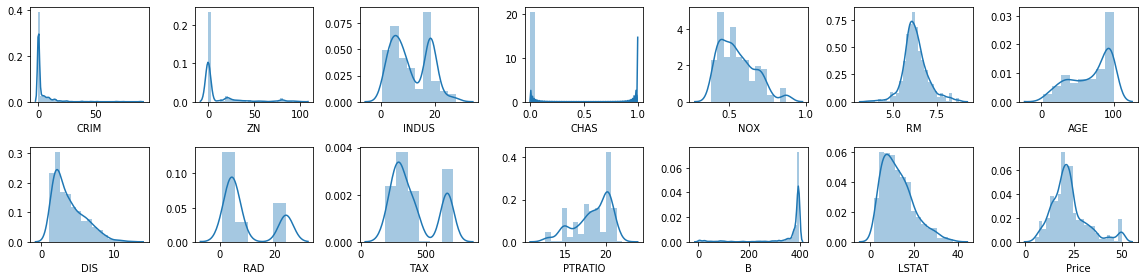

In [29]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,4)) 

col = data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],ax= ax[i][j])
        index = index+1


plt.tight_layout()

#### We are going to create now a correlation matrix to quantify and summarize the relationships between the variables.

#### This correlation matrix is closely related witn covariance matrix, in fact it is a rescaled version of the covariance matrix, computed from standardize features.

#### It is a square matrix (with the same number of columns and rows) that contains the Person’s r correlation coefficient.

In [30]:
cormat = data.corr()
cormat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


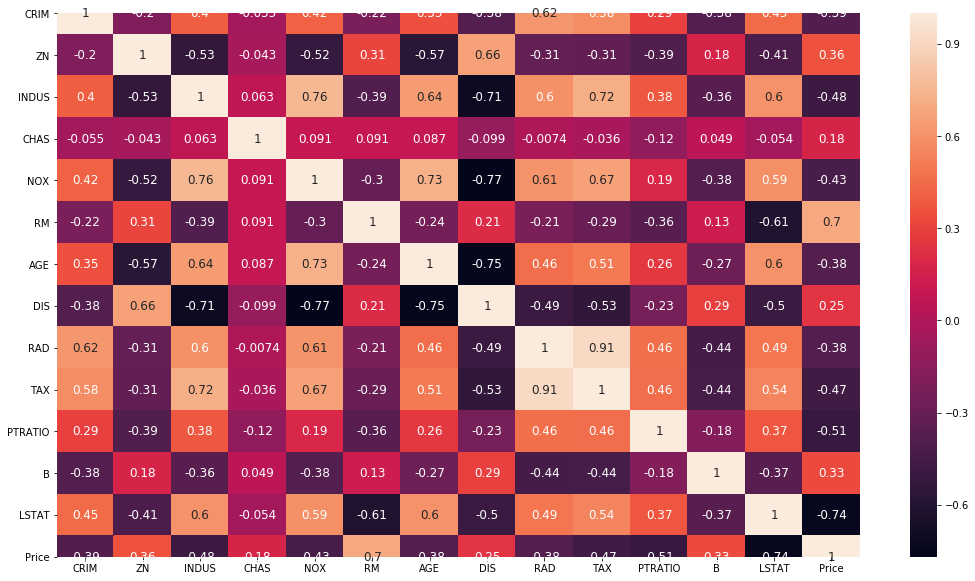

In [54]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(cormat,annot=True,annot_kws={'size': 12})

In [45]:
cormat.index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'], dtype=object)

In [57]:
def getCorrelatedFeature(cordata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(cordata.index):
        if abs(cordata[index])> threshold:
            feature.append(index)
            value.append(cordata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [58]:
threshold = 0.5
cor_value = getCorrelatedFeature(cormat['Price'],threshold)
cor_value

,Corr Value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [62]:
cor_value.index.values

array(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype=object)

In [64]:
correlated_data = data[cor_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


## Pairplot and Corrmat of correlated data¶


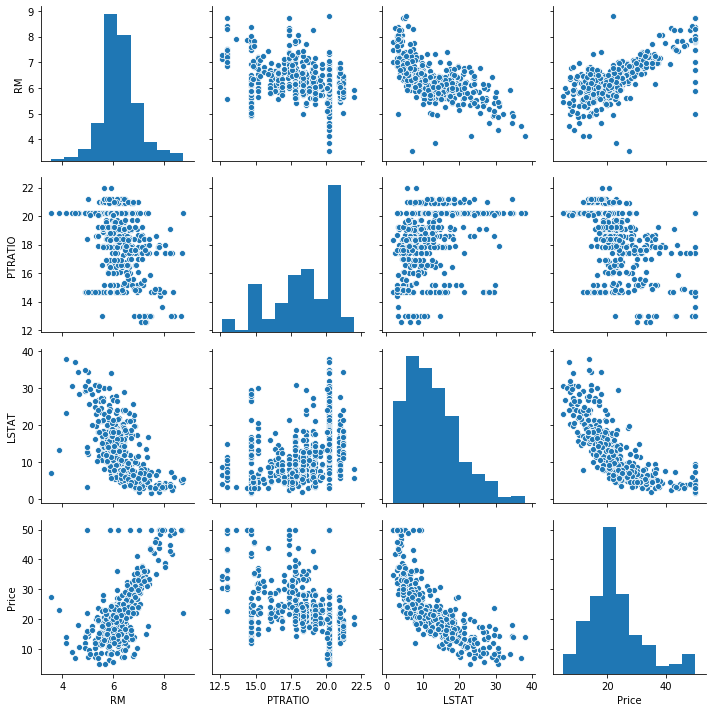

In [66]:
sns.pairplot(correlated_data)
plt.tight_layout()

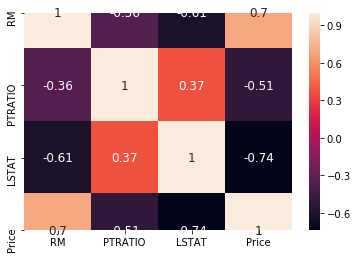

In [67]:
sns.heatmap(correlated_data.corr(),annot=True, annot_kws={'size': 12})

## Shuffle and Split the Data

#### we will take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [68]:
X = correlated_data.drop(labels=['Price'], axis = 1)
y = correlated_data['Price']
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [70]:
X_train.shape, X_test.shape

((404, 3), (102, 3))

## Lets train the mode

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
y_predict = model.predict(X_test)

In [73]:
df = pd.DataFrame(data = [y_predict, y_test])
df.T

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2
5,20.170639,19.9
6,19.667634,20.6
7,21.179452,18.7
8,17.053618,16.1
9,21.476452,18.6


## Defining performance metrics

#### It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

#### The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.

#### For the performance_metric function in the code cell below, you will need to implement the following:

#### Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict. Assign the performance score to the score variable.

## Regression Evaluation Metrics
####  Here are three common evaluation metrics for regression problems:

#### Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
#### Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
#### Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
#### Comparing these metrics:

#### MAE is the easiest to understand, because it's the average error.
#### MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
#### RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
#### All of these are loss functions, because we want to minimize them.

In [74]:
from sklearn.metrics import r2_score

In [75]:
correlated_data.columns


Index(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype='object')

In [77]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.4881642015692508
mae:  4.404434993909256
mse:  41.67799012221682


## Store feature performance

In [78]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [79]:
def performance_metrics(features, th, y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_dataframe = pd.DataFrame(data= [total_features_name, total_features, selected_correlation_value, r2_scores, mae_value, mse_value],
                                    index = ['features name', '#feature', 'corr_value', 'r2_score', 'MAE', 'MSE'])
    return metrics_dataframe.T

In [80]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678


## regression plot of the features correlated with the House Price

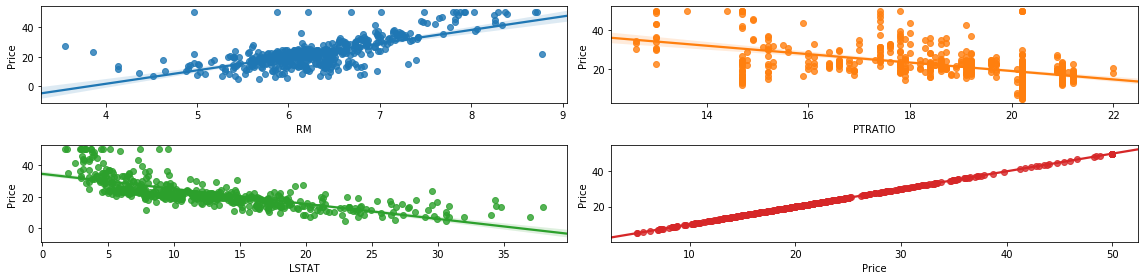

In [82]:
rows = 2
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (16, 4))

col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['Price'], ax = ax[i][j])
        index = index + 1
fig.tight_layout()

## Let's find out other combination of columns to get better accuracy with >60%

In [84]:
cormat['Price']


CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [85]:
threshold = 0.60
corr_value = getCorrelatedFeature(cormat['Price'], threshold)
corr_value

,Corr Value
RM,0.695360
LSTAT,-0.737663
Price,1.000000


In [86]:
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,LSTAT,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [87]:
def get_y_predict(corr_data):
    X = corr_data.drop(labels = ['Price'], axis = 1)
    y = corr_data['Price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return y_predict

In [88]:
y_predict = get_y_predict(correlated_data)

In [89]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831


## Let's find out other combination of columns to get better accuracy > 70%

In [90]:
cormat['Price']

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [92]:
threshold = 0.70
corr_value = getCorrelatedFeature(cormat['Price'], threshold)
corr_value

,Corr Value
LSTAT,-0.737663
Price,1.000000


In [93]:
correlated_data = data[corr_value.index]
correlated_data.head()

,LSTAT,Price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [94]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'Price'],1,0.7,0.430957,4.86401,46.3363


In [95]:
correlated_data = data[['RM', 'Price']]
correlated_data.head()

,RM,Price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [96]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'Price'],1,0.7,0.430957,4.86401,46.3363
3,['RM' 'Price'],1,0.7,0.423944,4.32474,46.9074


## Let's find out other combination of columns to get better accuracy > 40%

In [98]:
threshold = 0.40
corr_value = getCorrelatedFeature(cormat['Price'], threshold)
corr_value

,Corr Value
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [99]:
correlated_data = data[corr_value.index]
correlated_data.head()


,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,Price
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


In [100]:
y_predict = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'Price'],1,0.7,0.430957,4.86401,46.3363
3,['RM' 'Price'],1,0.7,0.423944,4.32474,46.9074
4,['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'P...,6,0.4,0.476203,4.3945,42.6519


## Now lets go ahead and understand what is Normalization and Standardization

### Standardization
### Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

### image.png

### Normalization
### Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

### This assumption is the base of the Vector Space Model often used in text classification and clustering contexts.

In [102]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [103]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.4881642015692508

## Defining performance metrics
### Plotting Learning Curves

In [104]:
from sklearn.model_selection import learning_curve, ShuffleSplit

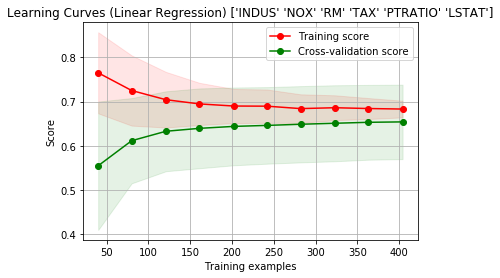

In [107]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):                      
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X = correlated_data.drop(labels = ['Price'], axis = 1)
y = correlated_data['Price']

title = "Learning Curves (Linear Regression) " + str(X.columns.values)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()